# Visualization of Sea Surface Height

After setting up Anaconda and our Python environment, we plot sea surface height as a practice example. To this end, we use `scripy.io.netcdf` to read model data and `matplotlib.pyplot` to plot sea surface height.
Firstly, we use `%pylab inline` to embed plots into this document and import our desired `scripy` function.

In [5]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


We store the data in a variable (commonly called a handle) using the `scripy` function on the file path where our data is located. We can then check the variables within this data set by calling the `.variables` function on our handle.

In [7]:
prog_file = scipy.io.netcdf_file('../example_o1/ocean.0001-0010.ssh.nc')
prog_file.variables

OrderedDict([('nv', <scipy.io.netcdf.netcdf_variable at 0x8372400>),
             ('ssh', <scipy.io.netcdf.netcdf_variable at 0x8372438>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x83724e0>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x8372518>),
             ('xh', <scipy.io.netcdf.netcdf_variable at 0x83725f8>),
             ('yh', <scipy.io.netcdf.netcdf_variable at 0x83726a0>),
             ('average_T1', <scipy.io.netcdf.netcdf_variable at 0x8372748>),
             ('average_T2', <scipy.io.netcdf.netcdf_variable at 0x83727f0>),
             ('average_DT', <scipy.io.netcdf.netcdf_variable at 0x8372898>)])

We are specifically interested in the `ssh` variable (sea surface height), so we create an appropriate handle to store this data. We can find a general description and the shape (i.e. dimensions) of this variable by calling two functions: `.long_name` and `.shape`.

In [9]:
ssh_handle = prog_file.variables['ssh']
print('Description =', ssh_handle.long_name)
print('Shape =',ssh_handle.shape)

('Description =', 'Sea Surface Height')
('Shape =', (10L, 320L, 360L))


We find that our handle does in fact contain data for sea surface height and that the data is in a 3 dimensional array. Examining the corresponding .cdl file (which can be opened in any generic text editor), we find that the dimensions of this array correspond to `time`, `yh` (h point nominal latitude) and `xh` (h point nominal longitude).
To plot, we call upon `plt.pcolormesh`, but because we want to plot only over the `(yh,xh)`'s, we must specify a time. We set this to `time = 0`.

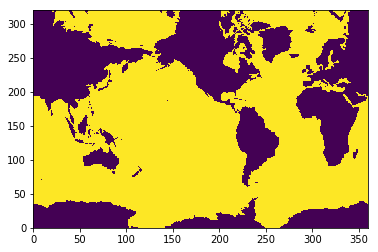

In [23]:
plt.pcolormesh(ssh_handle[0])

This is a good start, but we want to remove the "<matplotlib...>" line that is outputed and add a scale. We do each of these by, respectively, adding a semicolon after our command and utilizing the `plt.colorbar()` command. 

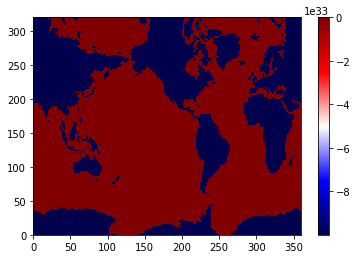

In [32]:
plt.pcolormesh(ssh_handle[0], cmap=cm.seismic); plt.colorbar();

The color scheme change is due to the `cmap=cm.seismic` command. However, this plot only captures 2 out of the 3 indices. We plot over time by defining our own function. But first, we import `ipywidgets`, a library that will make our plot interactive, and find a more approprate range.

In [39]:
import ipywidgets
[ssh_handle[0].min(), ssh_handle[0].max()]

[-1e+34, 1.1518394]

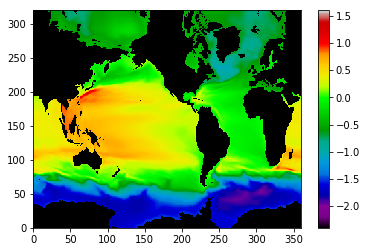

In [115]:
def plot_ssh(record):
    plt.pcolormesh(ssh_handle[record], cmap=cm.spectral)
    plt.clim(-2.4, 1.6) # Fixed scale here
    plt.colorbar()
    
ipywidgets.interact(plot_ssh, record=(0,ssh_handle.shape[0],1));

We use a loop to redraw over time.

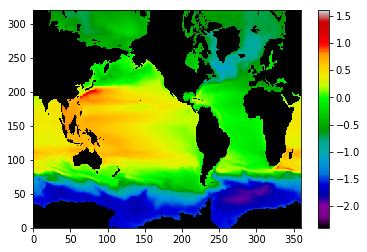

In [117]:
from IPython import display
for n in range(ssh_handle.shape[0]):
    display.display(plt.gcf())
    plt.clf()
    plot_ssh(n)
    display.clear_output(wait=True)